In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Hourdata.csv')

In [3]:
# Define morning and evening rush hour periods
morning_rush_hours = (8, 10)  # Morning: 8 AM - 10 AM
evening_rush_hours = (17, 19)  # Evening: 5 PM - 7 PM

def categorize_hour(hour):
    """Classifies the given hour as 'Morning Rush Hour', 'Evening Rush Hour', or 'Weak Hour'."""
    if morning_rush_hours[0] <= hour <= morning_rush_hours[1]:
        return 'Morning Rush Hour'
    elif evening_rush_hours[0] <= hour <= evening_rush_hours[1]:
        return 'Evening Rush Hour'
    else:
        return 'Weak Hour'

# Apply the function to classify each hour in the dataset
df['Time_Category'] = df['Hour'].apply(categorize_hour)
df.head(2)


,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,...,day_of_week,is_weekday,is_weekend,is_holiday,is_working_day,month_year,Rush_Hour and Weak_hour,weather_condition,time_of_day,Time_Category
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,...,4,True,False,False,True,2021-01,Weak Hour,cloudy,Night,Weak Hour
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,...,4,True,False,False,True,2021-01,Weak Hour,cloudy,Night,Weak Hour


In [4]:
df.head(2)

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,...,day_of_week,is_weekday,is_weekend,is_holiday,is_working_day,month_year,Rush_Hour and Weak_hour,weather_condition,time_of_day,Time_Category
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,...,4,True,False,False,True,2021-01,Weak Hour,cloudy,Night,Weak Hour
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,...,4,True,False,False,True,2021-01,Weak Hour,cloudy,Night,Weak Hour


In [5]:
df.isnull().sum()

Casual                     0
Date                       0
Hour                       0
Member                     0
Total_rides                0
Humidity                   0
Temp                       0
weather                    0
Windspeed                  0
Count                      0
Month                      0
year                       0
day of week                0
Season                     0
day_of_week                0
is_weekday                 0
is_weekend                 0
is_holiday                 0
is_working_day             0
month_year                 0
Rush_Hour and Weak_hour    0
weather_condition          0
time_of_day                0
Time_Category              0
dtype: int64

In [6]:
# Function to categorize weather codes
def categorize_weather_code(code):
    if code == 0:
        return 'sunny'
    elif 1 <= code <= 3:
        return 'cloudy'
    elif 51 <= code <= 55:
        return 'foggy'
    elif 61 <= code <= 65:
        return 'rainy'
    elif 71 <= code <= 75:
        return 'snow'
    else:
        return 'unknown'  # For any code that doesn't match the given categories

# Apply the function to create the new column
df['weather_condition'] = df['weather'].apply(categorize_weather_code)

# This will print the first few rows of the DataFrame to verify the new column
df.head()

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,...,day_of_week,is_weekday,is_weekend,is_holiday,is_working_day,month_year,Rush_Hour and Weak_hour,weather_condition,time_of_day,Time_Category
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,...,4,True,False,False,True,2021-01,Weak Hour,cloudy,Night,Weak Hour
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,...,4,True,False,False,True,2021-01,Weak Hour,cloudy,Night,Weak Hour
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2,...,4,True,False,False,True,2021-01,Weak Hour,cloudy,Night,Weak Hour
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,3,...,4,True,False,False,True,2021-01,Weak Hour,cloudy,Night,Weak Hour
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,4,...,4,True,False,False,True,2021-01,Weak Hour,cloudy,Morning,Weak Hour


In [7]:
df.head(2)

,Casual,Date,Hour,Member,Total_rides,Humidity,Temp,weather,Windspeed,Count,...,day_of_week,is_weekday,is_weekend,is_holiday,is_working_day,month_year,Rush_Hour and Weak_hour,weather_condition,time_of_day,Time_Category
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,0,...,4,True,False,False,True,2021-01,Weak Hour,cloudy,Night,Weak Hour
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,1,...,4,True,False,False,True,2021-01,Weak Hour,cloudy,Night,Weak Hour


In [8]:
df.columns

Index(['Casual', 'Date', 'Hour', 'Member', 'Total_rides', 'Humidity', 'Temp',
       'weather', 'Windspeed', 'Count', 'Month', 'year', 'day of week',
       'Season', 'day_of_week', 'is_weekday', 'is_weekend', 'is_holiday',
       'is_working_day', 'month_year', 'Rush_Hour and Weak_hour',
       'weather_condition', 'time_of_day', 'Time_Category'],
      dtype='object')

1. Time-Based Analysis:

Daily Trends:

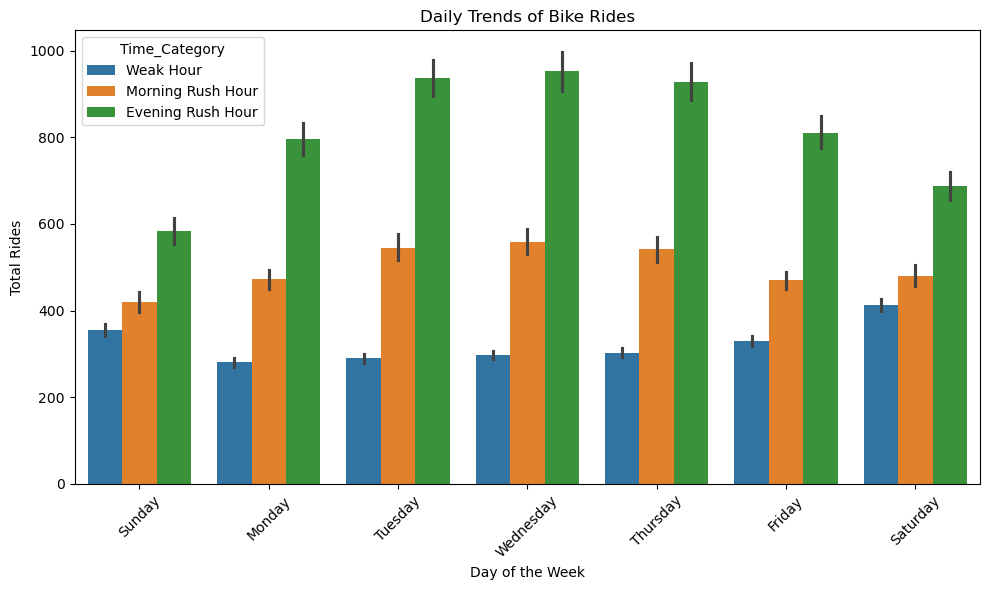

In [9]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(10, 6))
sns.barplot(x='day of week', y='Total_rides', hue='Time_Category', data=df, order=day_order)
plt.title('Daily Trends of Bike Rides')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

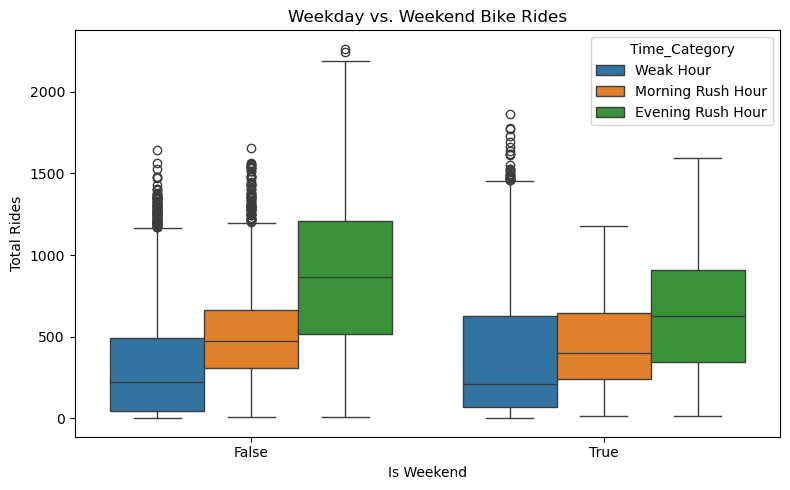

In [10]:
# Weekday vs. Weekend Comparison
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_weekend', y='Total_rides', hue='Time_Category', data=df)
plt.title('Weekday vs. Weekend Bike Rides')
plt.xlabel('Is Weekend')
plt.ylabel('Total Rides')
plt.tight_layout()
plt.show()

Hourly Trends: 

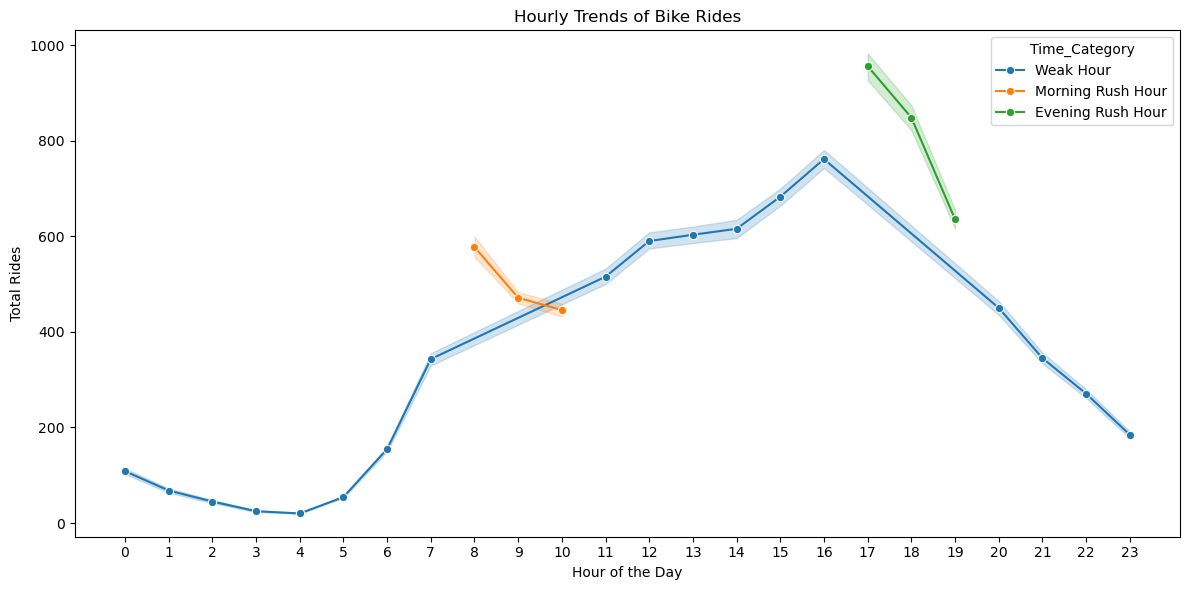

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Total_rides', hue='Time_Category', data=df, marker='o')
plt.title('Hourly Trends of Bike Rides')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rides')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.tight_layout()
plt.show()

Monthly Trends:

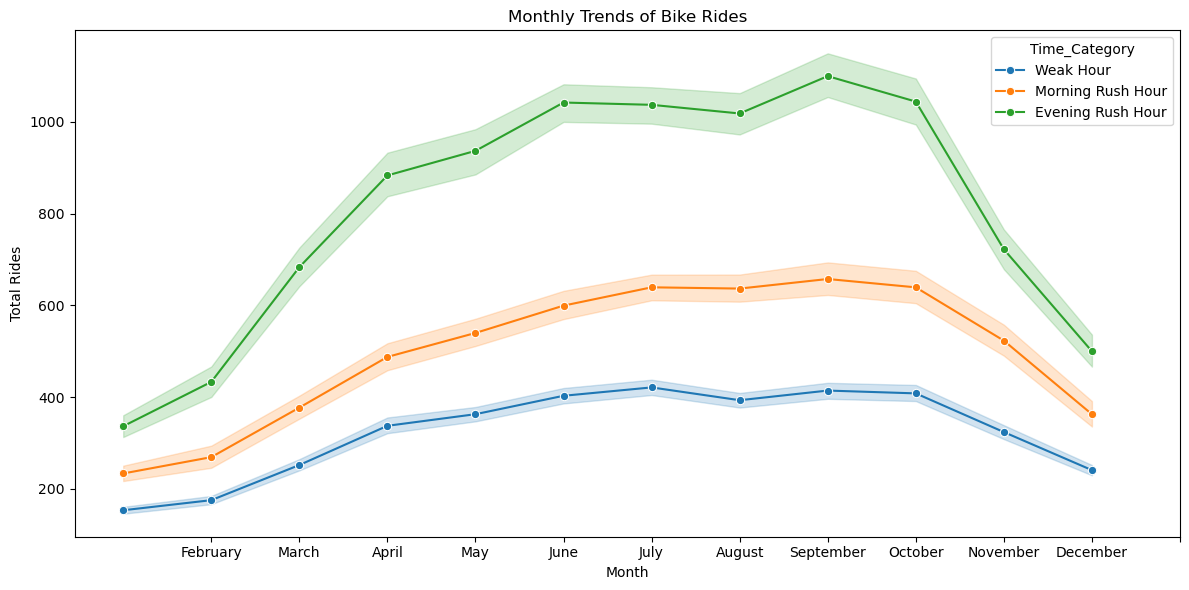

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Total_rides', hue='Time_Category', data=df, marker='o')
plt.title('Monthly Trends of Bike Rides')
plt.xlabel('Month')
plt.ylabel('Total Rides')
plt.xticks(range(1, 13)) # Set x-axis ticks for each month
plt.tight_layout()
plt.show()

2. Weather-Related Analysis:

Weather Impact:

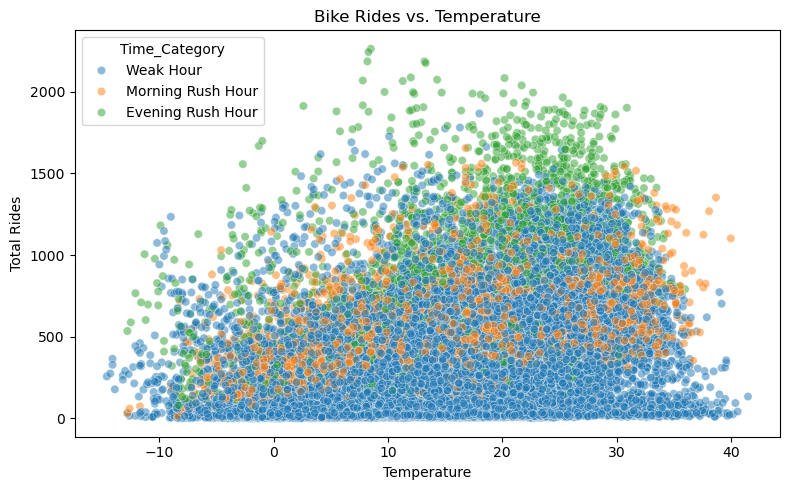

In [13]:
# Example: Relationship with Temperature
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Temp', y='Total_rides', hue='Time_Category', data=df, alpha=0.5)
plt.title('Bike Rides vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Total Rides')
plt.tight_layout()
plt.show()

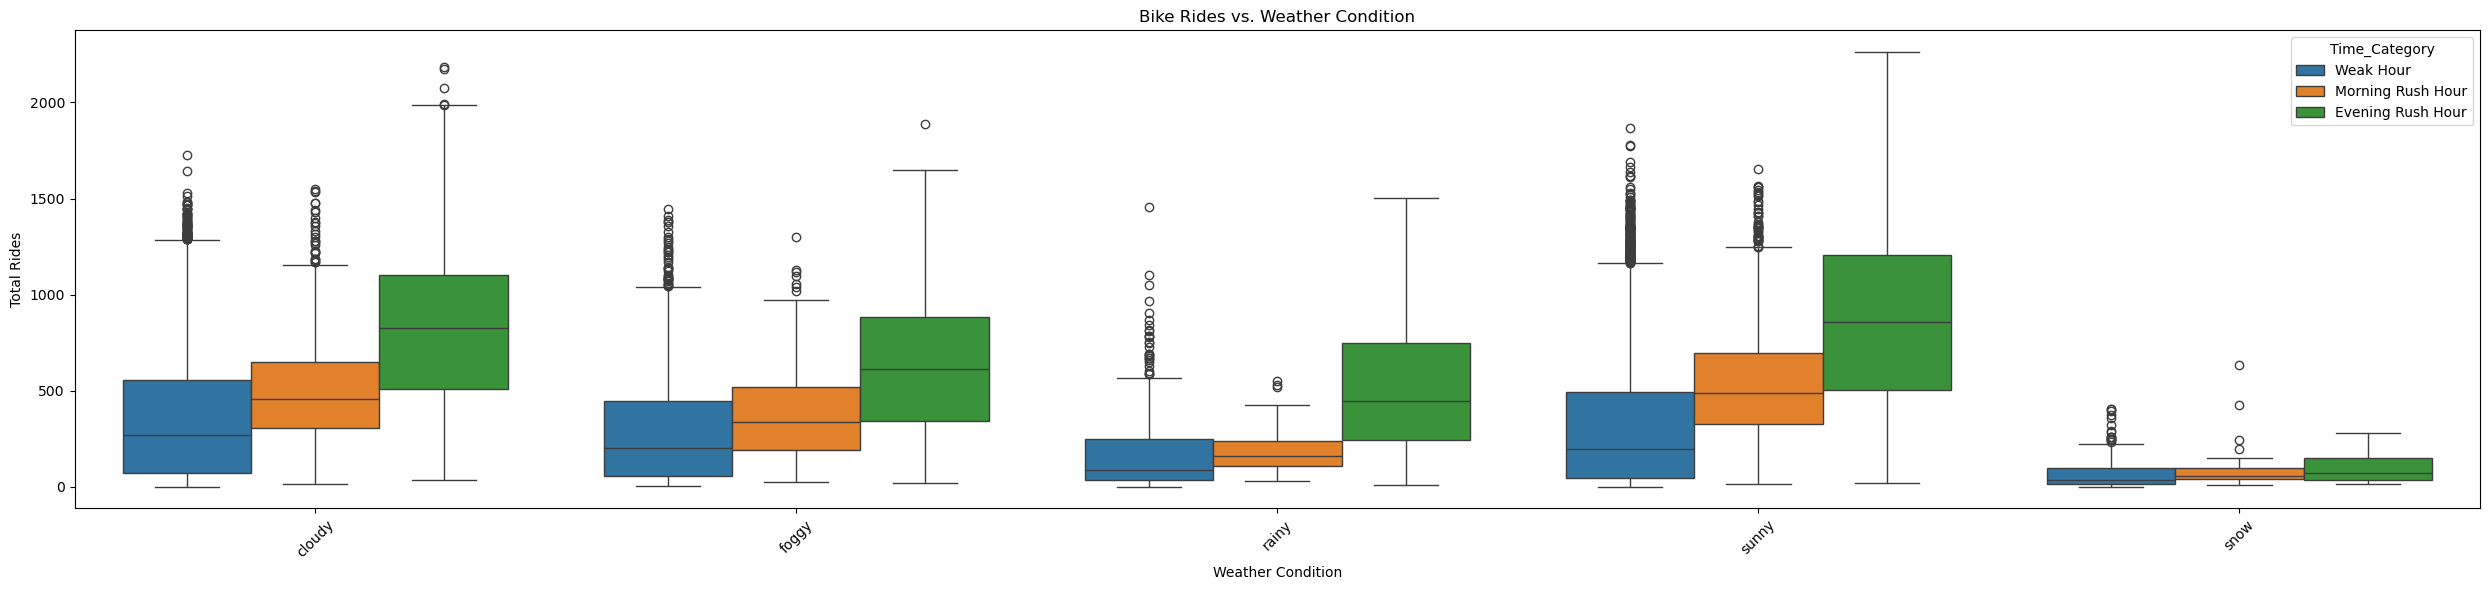

In [14]:
# Example: Impact of Weather Condition (Categorical)
plt.figure(figsize=(25, 6))
sns.boxplot(x='weather_condition', y='Total_rides', hue='Time_Category', data=df)
plt.title('Bike Rides vs. Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

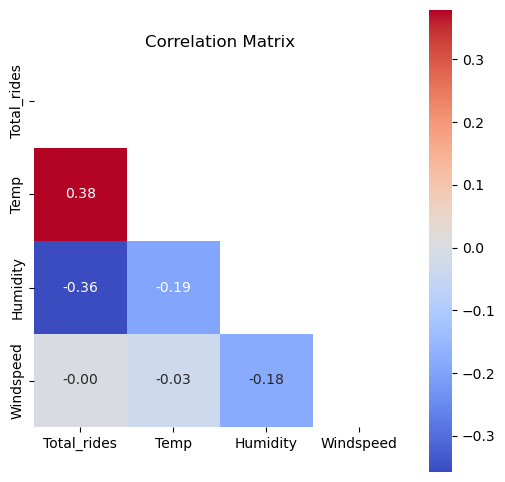

In [15]:
# Create a correlation matrix for red wine features
plt.figure(figsize=(6,6))
#numerical columns that are related to total rides, casual, and member
numeric_columns = ['Total_rides', 'Temp', 'Humidity', 'Windspeed']
corr_matrix = df[numeric_columns].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, mask=mask, fmt = '.2f')
plt.title('Correlation Matrix')

plt.show()

3. User-Based Analysis:

User Type

C:\Users\meeta\AppData\Local\Temp\ipykernel_18076\2810217415.py:6: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\meeta\anaconda3\envs\CodeAcadamyBerlinCAB\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


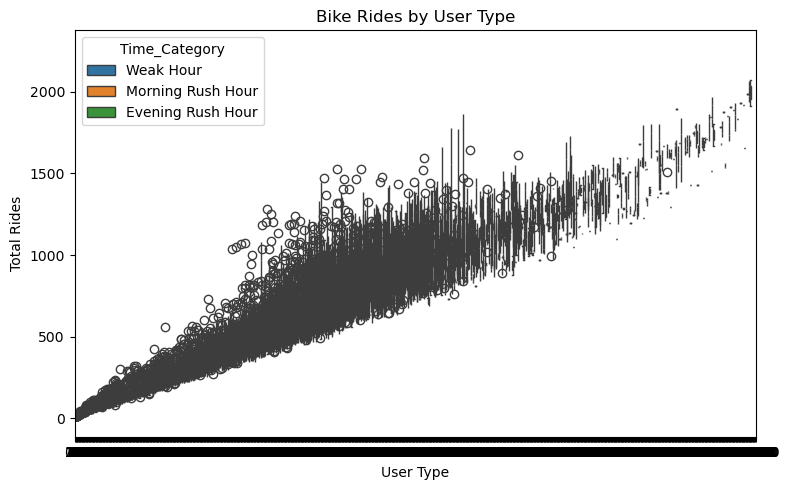

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Member', y='Total_rides', hue='Time_Category', data=df)
plt.title('Bike Rides by User Type')
plt.xlabel('User Type')
plt.ylabel('Total Rides')
plt.tight_layout()
plt.show()

4. Combined Analysis:

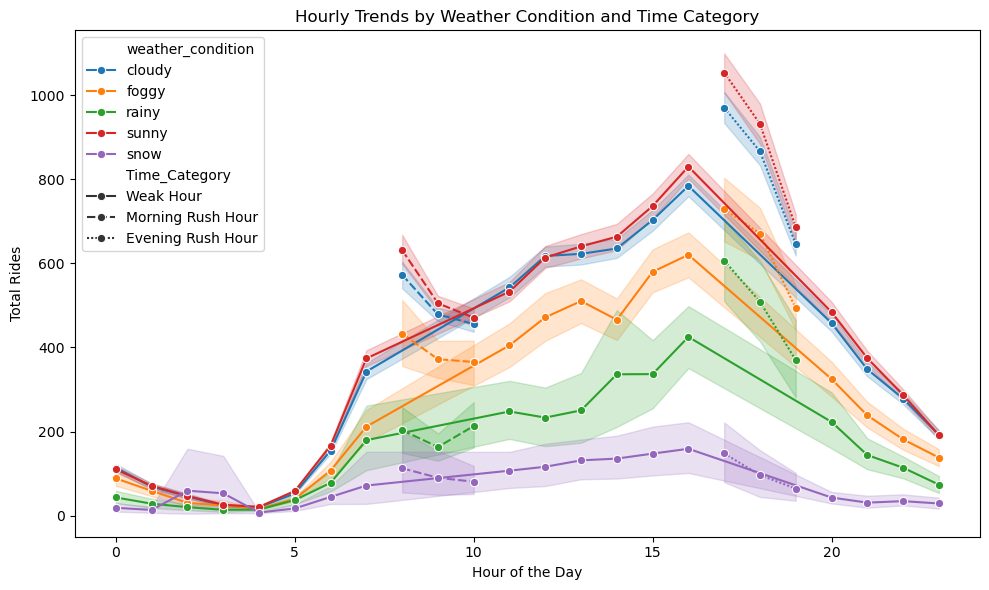

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hour', y='Total_rides', hue='weather_condition', style='Time_Category', data=df, marker='o') # Combine time, weather, and time category
plt.title('Hourly Trends by Weather Condition and Time Category')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rides')
plt.tight_layout()
plt.show()

In [18]:
df.Season.value_counts()

Season
Spring    6624
Summer    6624
Autumn    6552
Winter    6480
Name: count, dtype: int64

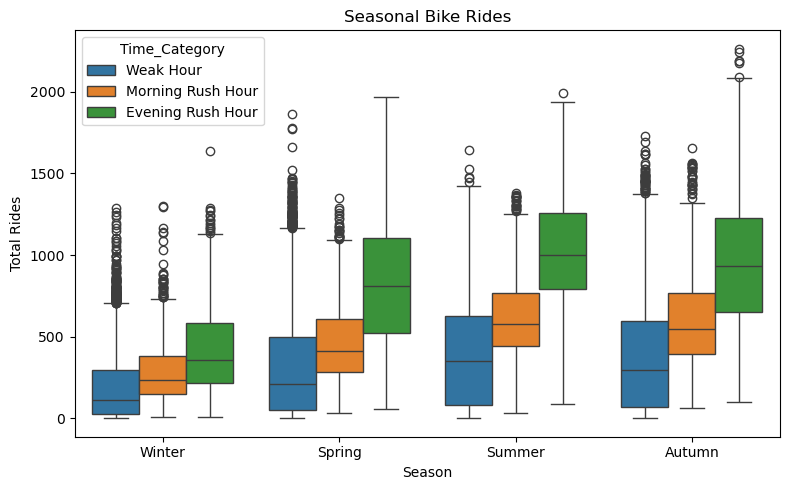

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Season', y='Total_rides', hue='Time_Category', data=df)
plt.title('Seasonal Bike Rides')
plt.xlabel('Season')
plt.ylabel('Total Rides')
plt.tight_layout()
plt.show()

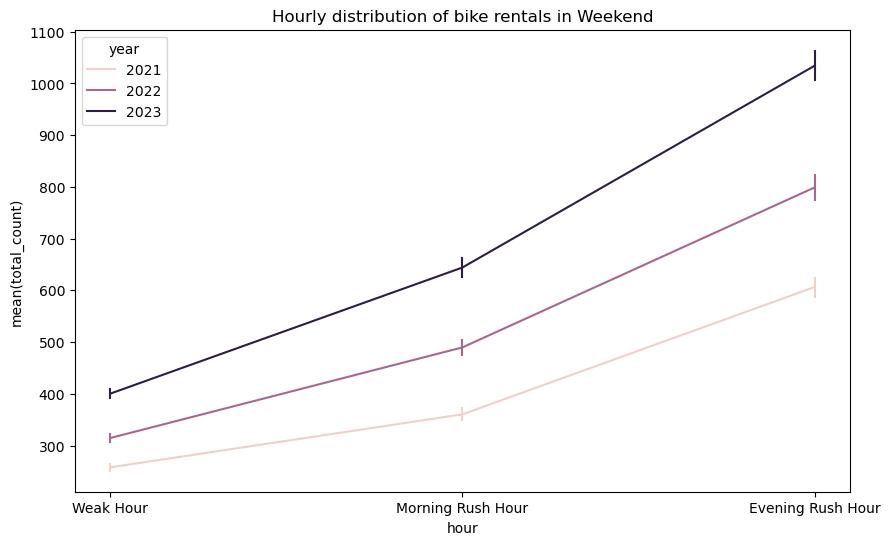

In [20]:
plt.figure(figsize=(10, 6))

# Calculate mean 'total_count' for each hour and season
sns.lineplot(x='Time_Category', y='Total_rides', data=df, hue='year', estimator='mean',err_style="bars")

# Add title and labels
plt.title('Hourly distribution of bike rentals in Weekend')
plt.xlabel('hour')
plt.ylabel('mean(total_count)')

# Show the plot
plt.show()

In [21]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['weather', 'Season', 'day_of_week', 'weather_condition', 'Rush_Hour and Weak_hour']
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

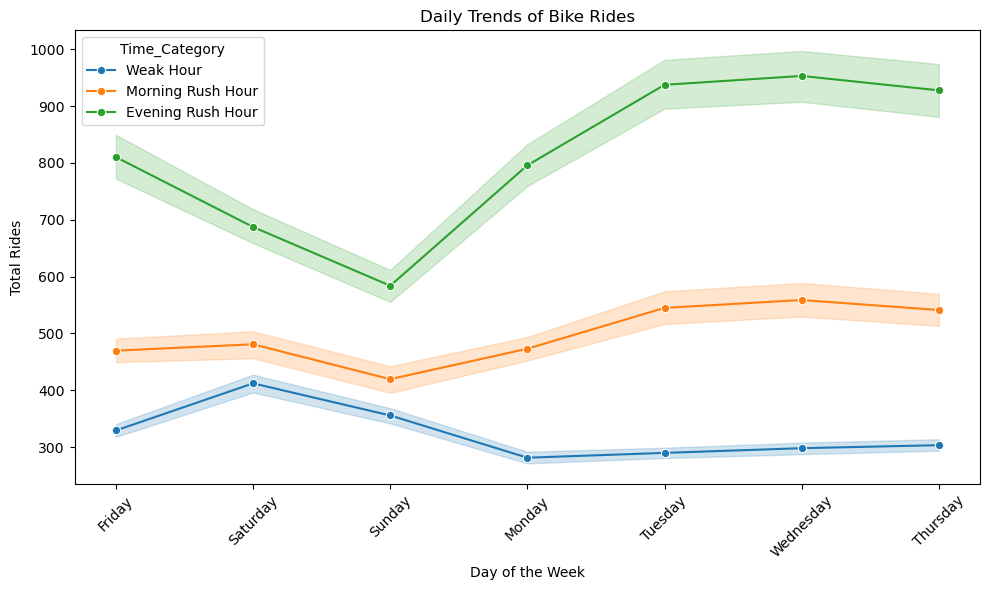

In [22]:
# Assuming your data is in a DataFrame called 'df'
Week_order = ['sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.figure(figsize=(10, 6))
sns.lineplot(x='day of week', y='Total_rides', hue='Time_Category', data=df, marker='o')
plt.title('Daily Trends of Bike Rides')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [23]:
#  Analyzing Morning Rush Hour Trends
# morning_rush = df[df['Time_Category'] == 'Morning Rush Hour']
# morning_rush_trends = morning_rush.groupby(morning_rush['timestamp'].dt.date)['ride_id'].count()


In [24]:
# # 4. Aggregate and Plot (Similar to your image, but more flexible)
# ride_counts = df.groupby(['year', 'Time_Category'])['ride_id'].count().unstack() # Assuming 'ride_id' is a unique identifier

# ride_counts.plot(kind='bar', figsize=(10, 6))
# plt.title('Bike Rides During Different Times (2021-2023)')
# plt.xlabel('Year')
# plt.ylabel('Total Rides')
# plt.xticks(rotation=0)
# plt.legend(title='Time Category')
# plt.tight_layout()
# plt.show()


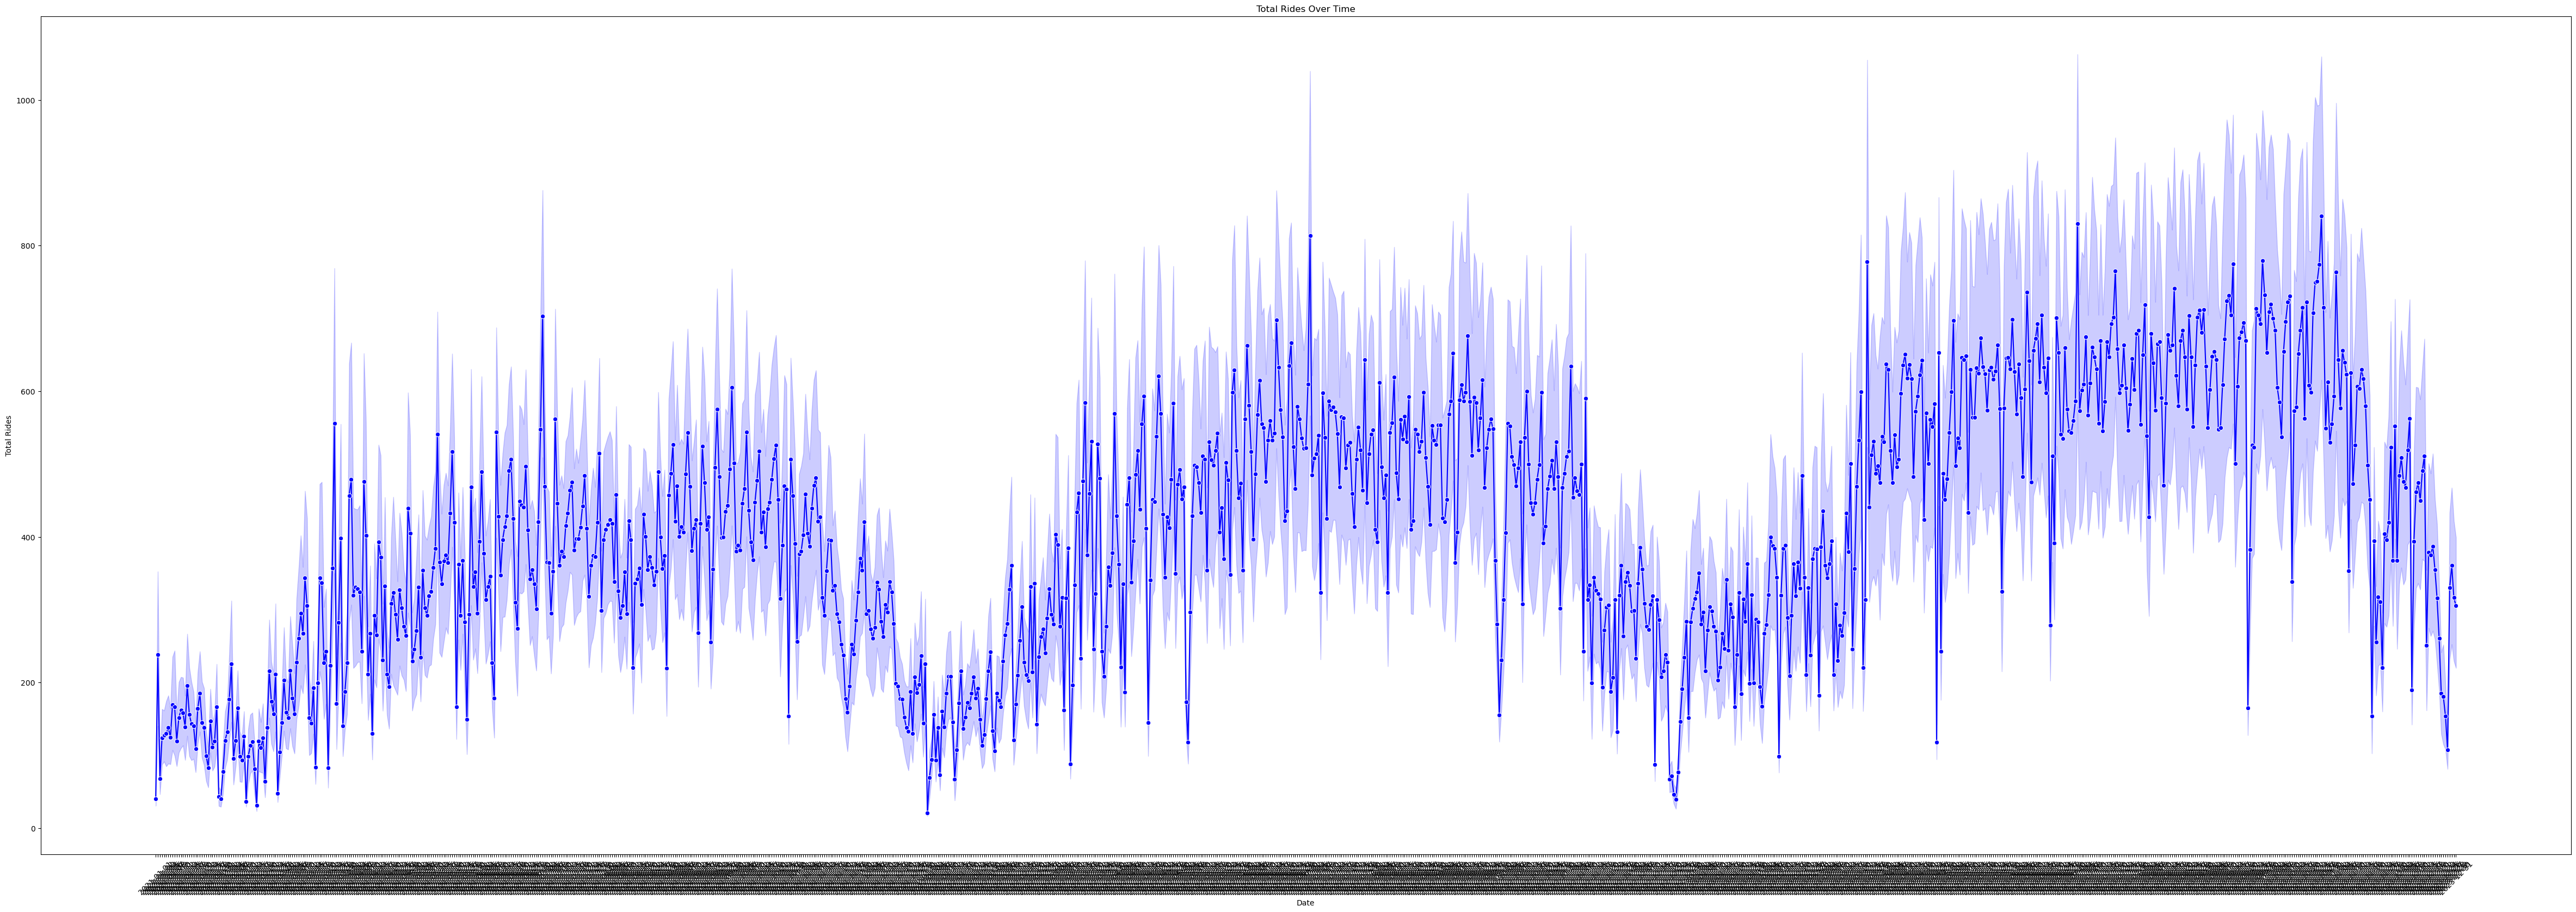

In [25]:
# Time Series Visualization
plt.figure(figsize=(60, 20))
sns.lineplot(x='Date', y='Total_rides', data=df, marker='o', color='b')
plt.title('Total Rides Over Time')
plt.xlabel('Date')
plt.ylabel('Total Rides')
plt.xticks(rotation=45)
plt.show()

C:\Users\meeta\AppData\Local\Temp\ipykernel_18076\2136931322.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Hour', y='Total_rides', data=df, palette='coolwarm')


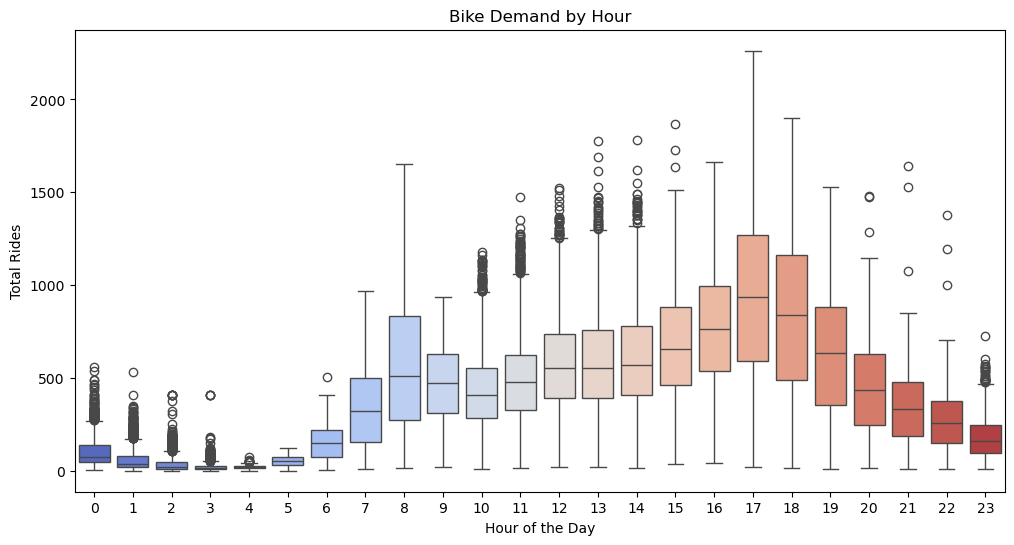

In [26]:
# Supply and Demand Analysis
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='Total_rides', data=df, palette='coolwarm')
plt.title('Bike Demand by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rides')
plt.show()

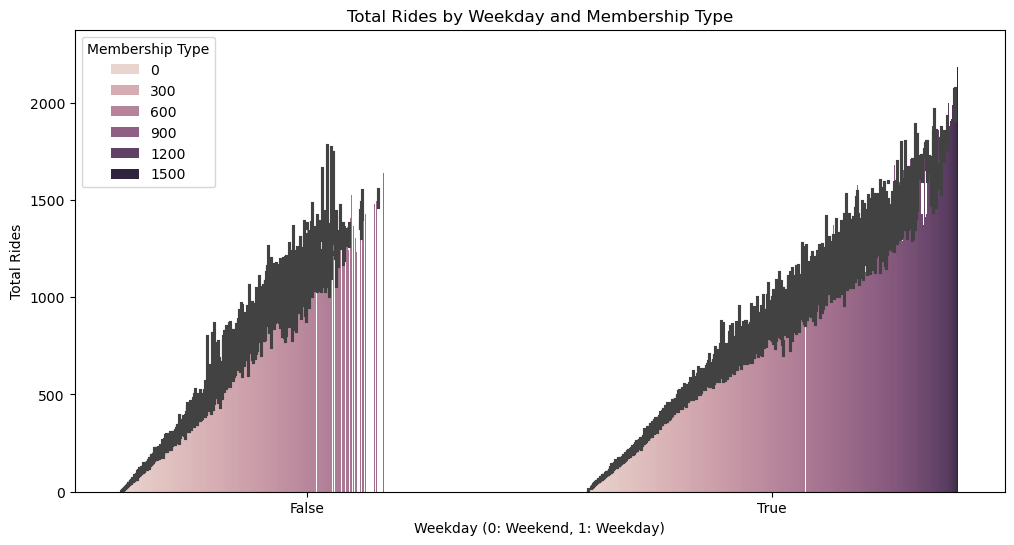

In [27]:
# KPI Analysis - Member vs Casual Users
plt.figure(figsize=(12, 6))
sns.barplot(x='is_weekday', y='Total_rides', hue='Member', data=df)
plt.title('Total Rides by Weekday and Membership Type')
plt.xlabel('Weekday (0: Weekend, 1: Weekday)')
plt.ylabel('Total Rides')
plt.legend(title='Membership Type')
plt.show()

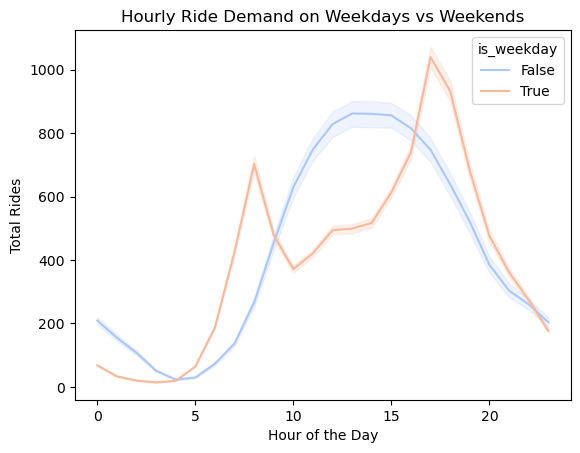

In [28]:
#  Further Analysis
# 1. Peak riding hours occur during morning and evening rush hours, indicating high commuting demand.
sns.lineplot(x='Hour', y='Total_rides', data=df, hue='is_weekday', palette='coolwarm')
plt.title('Hourly Ride Demand on Weekdays vs Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Rides')
plt.show()

c:\Users\meeta\anaconda3\envs\CodeAcadamyBerlinCAB\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


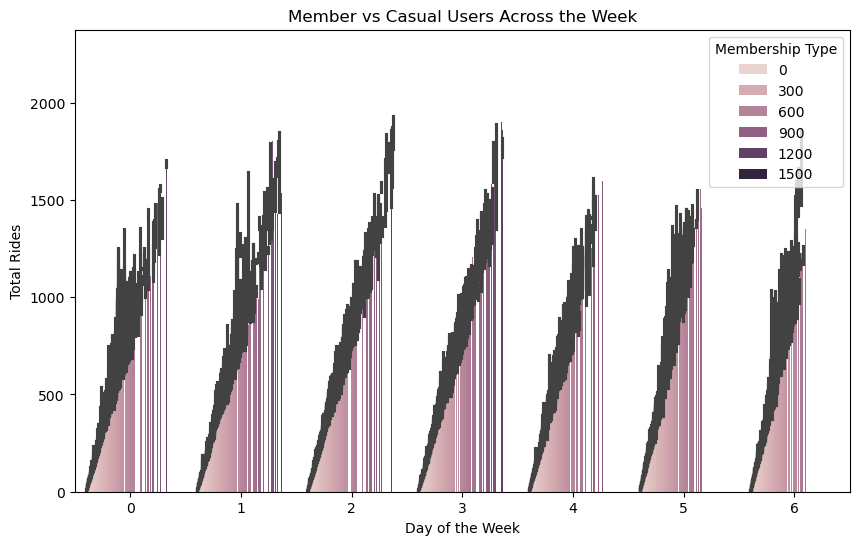

In [29]:
# Weekdays show higher demand for member users, whereas casual users prefer weekends.
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='Total_rides', hue='Member', data=df)
plt.title('Member vs Casual Users Across the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rides')
plt.legend(title='Membership Type')
plt.show()

c:\Users\meeta\anaconda3\envs\CodeAcadamyBerlinCAB\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


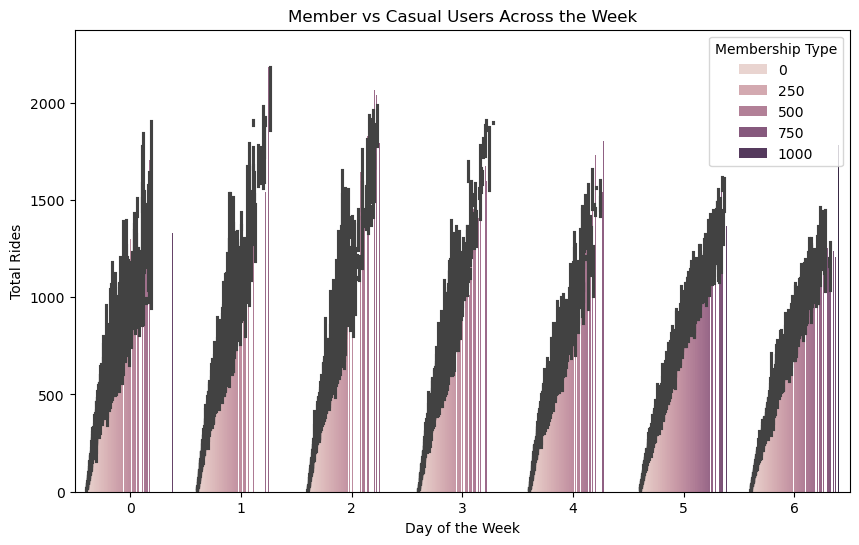

In [30]:
# Weekdays show higher demand for member users, whereas casual users prefer weekends.
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='Total_rides', hue='Casual', data=df)
plt.title('Member vs Casual Users Across the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rides')
plt.legend(title='Membership Type')
plt.show()

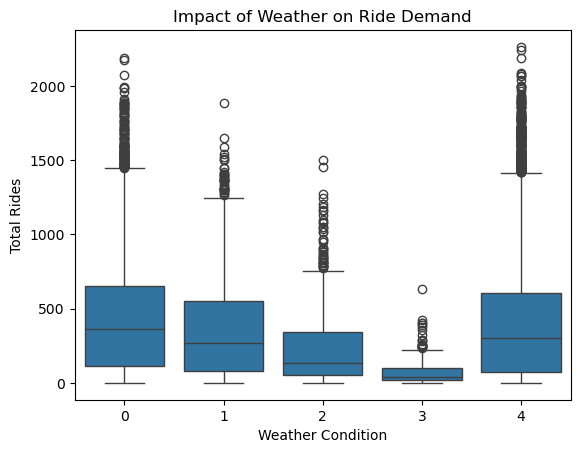

In [31]:
# 3. Weather conditions significantly impact ride frequency, with clear days showing maximum demand.
sns.boxplot(x='weather_condition', y='Total_rides', data=df)
plt.title('Impact of Weather on Ride Demand')
plt.xlabel('Weather Condition')
plt.ylabel('Total Rides')
plt.show()

In [32]:
# Predictive Model
X = df[['Casual', 'Date' , 'Hour', 'Member', 'Total_rides', 'Humidity', 'Temp', 'weather', 'Windspeed', 'Month', 'year', 'day of week', 'Season', 'day_of_week', 'is_weekday', 'is_weekend', 'is_holiday', 'is_working_day', 'month_year', 'weather_condition', 'Rush_Hour and Weak_hour']]
y = df['Count']

# Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Model
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest: MSE = {rf_mse:.2f}, R-squared = {rf_r2:.2f}")

Random Forest: MSE = 165693.26, R-squared = 1.00


In [33]:
# Predictive Model
X1 = df[['Casual', 'Date' , 'Hour', 'Member', 'Humidity', 'Temp', 'weather', 'Windspeed', 'Month', 'year', 'day of week', 'Season', 'day_of_week', 'is_weekday', 'is_weekend', 'is_holiday', 'is_working_day', 'month_year', 'weather_condition', 'Rush_Hour and Weak_hour']]
y1 = df['Total_rides']

# Encode categorical variables
X1_encoded = pd.get_dummies(X, drop_first=True)

# Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1_encoded, y, test_size=0.2, random_state=42)

# Train Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Model
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print(f"Random Forest: MSE = {rf_mse:.2f}, R-squared = {rf_r2:.2f}")

Random Forest: MSE = 165693.26, R-squared = 1.00


In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder

In [35]:
#prepare the data for mutivariate linear regression
X2 = df[['Temp', 'Humidity', 'Windspeed']]
y2 = df['Member']

#split the data
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)

#make predictions
predictions = model.predict(X_test)

Mean Squared Error (MSE): 42343.43792003396
R^2 Score: 0.17142804918759635


In [ ]:
# Scatter plot: predicted vs actual values
plt.scatter(predictions, y_test, label='Actual vs Predicted')

# Plot the trend line
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color='red', label='Trend Line')

# Adding labels and title
plt.xlabel('Predicted Total Rides')
plt.ylabel('Actual Total Rides')
plt.title('Random Forest Regression: Actual vs Predicted with Trendline')

# Display legend
plt.legend()

# Show the plot
plt.show()